In [39]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader.data as web
     

end  = dt.datetime.now()
start = end - dt.timedelta(days=5000)
df = web.DataReader('GOOG', 'stooq', start, end)


In [41]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2025-02-18,187.440,187.78,183.58,185.80,19796028
1,2025-02-14,186.830,188.15,186.11,186.87,12714154
2,2025-02-13,185.930,187.99,184.88,187.88,12729334
3,2025-02-12,185.230,186.83,183.63,185.43,17632314
4,2025-02-11,186.835,188.80,186.08,187.07,13028100


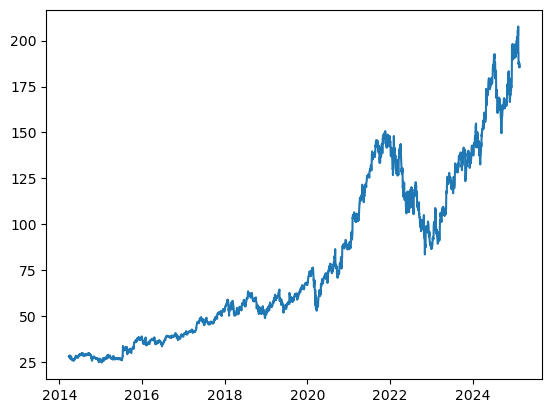

In [47]:
plt.plot(df.Date,df.Close)

In [49]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2736    27.86985
2737    27.86215
2738    27.84895
2739    27.83670
2740    27.82250
Name: Close, Length: 2741, dtype: float64

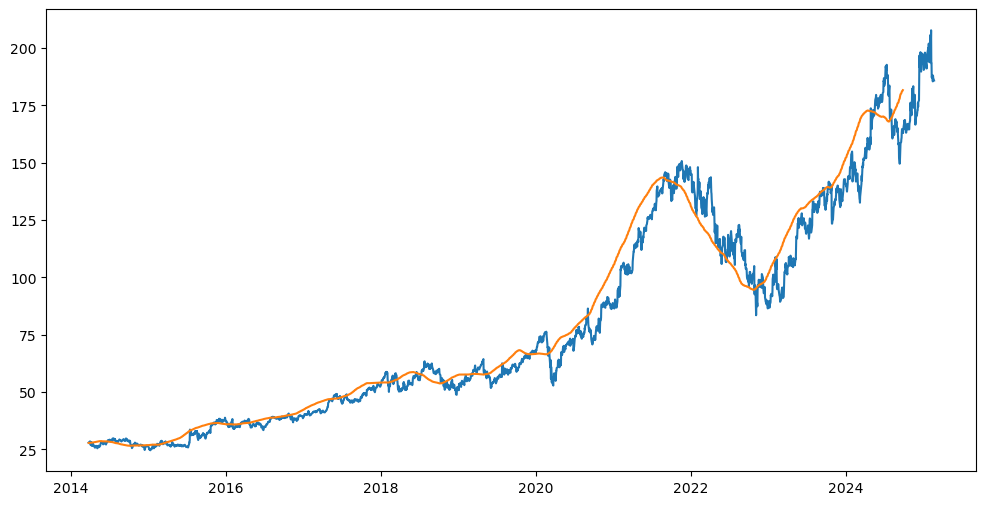

In [51]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma100)

In [53]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2736    27.575318
2737    27.591660
2738    27.605685
2739    27.621638
2740    27.638115
Name: Close, Length: 2741, dtype: float64

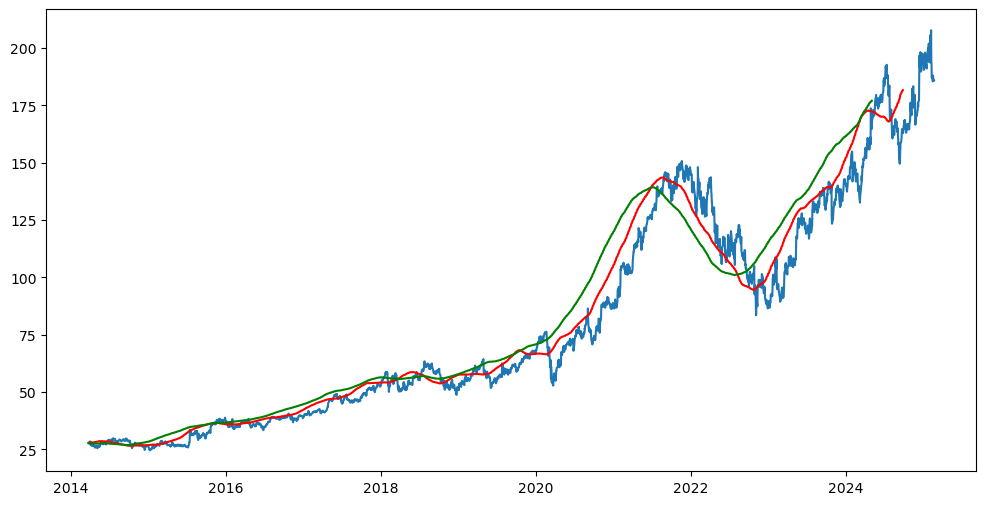

In [55]:
plt.figure(figsize=(12,6))
plt.plot(df.Date,df.Close)
plt.plot(df.Date,ma100,'r')
plt.plot(df.Date,ma200,'g')

In [57]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_train_date = pd.DataFrame(df['Date'][0:int(len(df)*0.7)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])
data_test_date = pd.DataFrame(df['Date'][int(len(df)*0.7):int(len(df))])
print(data_train.shape, data_test.shape)
data_test.head()

(1918, 1) (823, 1)


,Close
1918,45.4365
1919,45.8895
1920,47.0245
1921,46.4065
1922,47.6135


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [61]:
data_train_arr = scaler.fit_transform(data_train)
data_train_arr

array([[0.86542141],
       [0.87199371],
       [0.87819747],
       ...,
       [0.00263506],
       [0.00417679],
       [0.        ]])

In [63]:
x_train = []
y_train = []

for i in range(100,data_train_arr.size):
  x_train.append(data_train_arr[i-100:i])
  y_train.append(data_train_arr[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape,y_train.shape

((1818, 100, 1), (1818,))

In [71]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
     

In [69]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [73]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0607
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0066
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0054
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - loss: 0.0052
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.0042
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0063
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0046
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0040
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0037
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0039
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0037
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - loss: 0.0032
Epoch 13/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0035
Epoch 14/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - loss: 0.0036
Epoch 15/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0

In [79]:
model.save("my_model.keras")


In [81]:
data_test.head()

,Close
1918,45.4365
1919,45.8895
1920,47.0245
1921,46.4065
1922,47.6135


In [83]:
past_100_days = data_train.tail(100)

In [87]:

final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [89]:
final_df.head()

,Close
0,51.7245
1,50.9190
2,50.9545
3,51.6250
4,51.0455


In [91]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.99020647],
       [0.96077106],
       [0.96206834],
       [0.98657044],
       [0.96539375],
       [0.97469395],
       [0.97423716],
       [0.97847616],
       [0.98392107],
       [1.        ],
       [0.98808697],
       [0.97451124],
       [0.98653389],
       [0.97392655],
       [0.97378038],
       [0.95759181],
       [0.95845058],
       [0.96239722],
       [0.87705098],
       [0.87845788],
       [0.87336013],
       [0.86954138],
       [0.90562763],
       [0.89877581],
       [0.91405079],
       [0.91289969],
       [0.9125708 ],
       [0.90833181],
       [0.90509775],
       [0.90754614],
       [0.87712406],
       [0.88516353],
       [0.887685  ],
       [0.87230038],
       [0.83890005],
       [0.85006395],
       [0.84180523],
       [0.85247579],
       [0.83491686],
       [0.82576284],
       [0.78989585],
       [0.78278823],
       [0.7966015 ],
       [0.80376393],
       [0.80217431],
       [0.78432304],
       [0.77188014],
       [0.781

In [93]:
input_data.shape

(923, 1)

In [95]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [97]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test.shape, y_test.shape

((823, 100, 1), (823,))

In [99]:
y_predicted = model.predict(x_test)
y_predicted.shape

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


(823, 1)

In [101]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

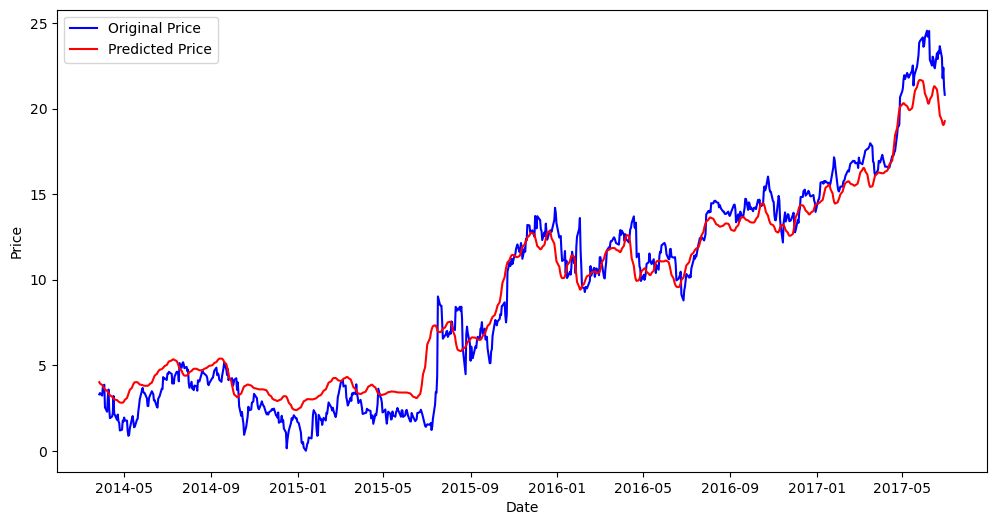

In [103]:
plt.figure(figsize=(12,6))
plt.plot(data_test_date,y_test,'b',label='Original Price')
plt.plot(data_test_date,y_predicted,'r',label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()